In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.datasets import load_digits

In [104]:
da  = load_digits()

In [105]:
print(da['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [106]:
da['data'][0][:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [107]:
da['data'].shape, np.unique(da['target'])

((1797, 64), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

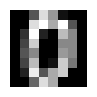

In [108]:
plt.figure(figsize=(1, 1))
plt.imshow(da['data'][0].reshape((8,8)), cmap= 'gray')
plt.axis('off')
plt.show()

In [109]:
x = da['data']
y = da['target']

y_label = da['target_names']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 777, stratify=y)
x_train.shape

(1347, 64)

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
scores = []
weights = []
c_label = [0.001 ,0.01, 0.1, 1, 10, 100, 1000]
for c in c_label:
    model = LogisticRegression(penalty= 'l2', C=c, max_iter=100000)
    model.fit(x_train, y_train)
    model.score(x_train, y_train), model.score(x_test, y_test)
    tr_score = model.score(x_train, y_train)
    te_score = model.score(x_test, y_test)
    scores.append((c, tr_score, te_score))

In [112]:
scores

[(0.001, 0.9725315515961396, 0.9577777777777777),
 (0.01, 0.9933184855233853, 0.9711111111111111),
 (0.1, 0.9992576095025983, 0.9688888888888889),
 (1, 1.0, 0.9688888888888889),
 (10, 1.0, 0.9666666666666667),
 (100, 1.0, 0.9622222222222222),
 (1000, 1.0, 0.9622222222222222)]

In [113]:
scores2= pd.DataFrame(scores, columns=['c','train','test'])

In [114]:
scores2['train']

0    0.972532
1    0.993318
2    0.999258
3    1.000000
4    1.000000
5    1.000000
6    1.000000
Name: train, dtype: float64

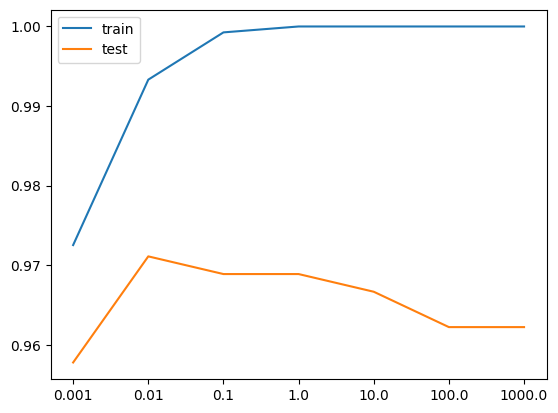

In [115]:
plt.plot(scores2['c'].astype('str'), scores2['train'], label = 'train')
plt.plot(scores2['c'].astype('str'), scores2['test'], label = 'test')
plt.legend()
plt.show()

In [116]:
scores = []
c_label = [0.001, 0.005 ,0.01, 0.05, 0.1]
for c in c_label:
    model = LogisticRegression(penalty= 'l2', C=c, max_iter=100000)
    model.fit(x_train, y_train)
    model.score(x_train, y_train), model.score(x_test, y_test)
    tr_score = model.score(x_train, y_train)
    te_score = model.score(x_test, y_test)
    scores.append((c, tr_score, te_score))

In [117]:
scores2= pd.DataFrame(scores, columns=['c','train','test'])

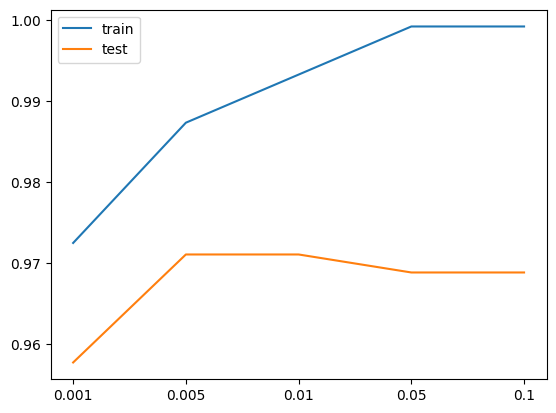

In [118]:
plt.plot(scores2['c'].astype('str'), scores2['train'], label = 'train')
plt.plot(scores2['c'].astype('str'), scores2['test'], label = 'test')
plt.legend()
plt.show()

In [119]:
model = LogisticRegression(penalty= 'l2', C=0.05, max_iter=10000)
model.fit(x, y)
final_score = model.score(x, y)


In [120]:
final_score

0.998330550918197

In [121]:
model = LogisticRegression(penalty= 'l2', C=0.005, max_iter=10000)
model.fit(x, y)
final_score2 = model.score(x, y)


In [122]:
final_score2

0.986644407345576

In [123]:
model = LogisticRegression(penalty= 'l2', C=0.005, max_iter=10000)
model.fit(x_train, y_train)
final_score3 = model.score(x_test, y_test)
final_score3

0.9711111111111111

별 데이터를 이용해서 예측모델만들기 <br>
target = star_type<br>
데이터프레임으로 데이터 읽기 <br>
두개의 컬럼은 데이터를 범주형 문자형 데이터임 적절하게 처리<br>
예측모델만들기<br>
평가

In [124]:
from sklearn.preprocessing import OneHotEncoder

In [125]:
df = pd.read_csv('star-dataset.csv')

In [126]:
df.head(1)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.0024,0.17,16.12,0,Red,M


In [127]:
df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [128]:
df['Star type'].unique()

array([0, 1, 2, 3, 4, 5])

In [129]:
df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [130]:
df['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [131]:
one = OneHotEncoder(sparse_output=False)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [133]:
df2 = df

In [134]:
encoded = one.fit_transform(df2[['Star color']])

In [135]:
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [136]:
print(one.feature_names_in_)

['Star color']


In [137]:
encoded_df = pd.DataFrame(encoded, columns=one.get_feature_names_out(['Star color']))

In [138]:
df2 = pd.concat([df2, encoded_df], axis=1)

In [139]:
encoded2 = one.fit_transform(df2[['Spectral Class']])

In [140]:
test = pd.get_dummies(df2['Spectral Class'])

In [141]:
test

,A,B,F,G,K,M,O
0,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
235,False,False,False,False,False,False,True
236,False,False,False,False,False,False,True
237,True,False,False,False,False,False,False
238,True,False,False,False,False,False,False


In [142]:
test = pd.get_dummies(df2['Spectral Class']).astype(int)

In [143]:
test

,A,B,F,G,K,M,O
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
235,0,0,0,0,0,0,1
236,0,0,0,0,0,0,1
237,1,0,0,0,0,0,0
238,1,0,0,0,0,0,0


In [144]:
encoded_df2 = pd.DataFrame(encoded2, columns=one.get_feature_names_out(['Spectral Class']))

In [145]:
df2 = pd.concat([df2, encoded_df2], axis=1)

In [146]:
df2.head(1)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Star color_Blue,Star color_Blue,Star color_Blue White,...,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class_A,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,3068,0.0024,0.17,16.12,0,Red,M,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [147]:
df3 = df2.drop('Star color', axis=1)

In [148]:
df3 = df3.drop('Spectral Class', axis=1)

In [149]:
df3.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_Blue,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,...,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class_A,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,3068,0.002400,0.1700,16.12,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,0.1542,16.60,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,0.1020,18.70,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,0.1600,16.65,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,0.1030,20.06,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [150]:
x = df3.drop('Star type', axis= 1)
y = df3['Star type']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=777, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((180, 30), (60, 30), (180,), (60,))

In [151]:
scores = []
c_label = [0.001 ,0.01, 0.1, 1, 10, 100, 1000]
for c in c_label:
    model = LogisticRegression(penalty= 'l2', C=c, max_iter=100000)
    model.fit(x_train, y_train)
    model.score(x_train, y_train), model.score(x_test, y_test)
    tr_score = model.score(x_train, y_train)
    te_score = model.score(x_test, y_test)
    scores.append((c, tr_score, te_score))

c:\Users\human\.conda\envs\human-da-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\human\.conda\envs\human-da-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [152]:
scores2= pd.DataFrame(scores, columns=['c','train','test'])

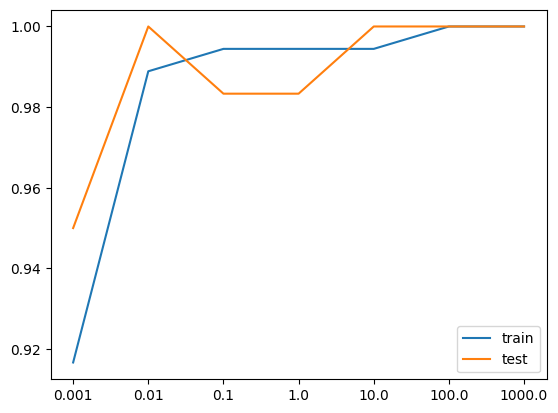

In [153]:
plt.plot(scores2['c'].astype('str'), scores2['train'], label = 'train')
plt.plot(scores2['c'].astype('str'), scores2['test'], label = 'test')
plt.legend()
plt.show()

In [154]:
model = LogisticRegression(penalty= 'l2', C=0.02, max_iter=100000)
model.fit(x, y)
model.score(x, y)

c:\Users\human\.conda\envs\human-da-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9958333333333333

강사님

In [155]:
df = pd.read_csv('star-dataset.csv')

In [156]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [157]:
#df2 = df.drop(['Star color', 'Spectral Class'], axis=1)
df2 = df.drop(df.columns[-2:], axis=1)

In [158]:
df2.head(1)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,3068,0.0024,0.17,16.12,0


In [159]:
x = df2.drop('Star type', axis = 1)
y = df2['Star type']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42, stratify=y)

In [160]:
from sklearn.neighbors import KNeighborsClassifier

In [161]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(x_train, y_train)
knn.score(x_train,y_train), knn.score(x_test,y_test)

(1.0, 0.7333333333333333)

In [162]:
model = LogisticRegression(max_iter=10000, solver='lbfgs')
model.fit(x_train, y_train)
model.score(x_train,y_train), model.score(x_test,y_test)

c:\Users\human\.conda\envs\human-da-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9888888888888889, 1.0)

수치형컬럼을 원핫인코딩으로 처리<br>
두개를 한번에 처리가능 하지만 디코딩을 할거면 하나씩하는걸 추천

In [163]:
from sklearn.preprocessing import OneHotEncoder

In [164]:
one = OneHotEncoder()

In [ ]:
#sparse metrix 방식
print(one.fit_transform(df[df.columns[-2:]]))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 480 stored elements and shape (240, 26)>
  Coords	Values
  (0, 10)	1.0
  (0, 24)	1.0
  (1, 10)	1.0
  (1, 24)	1.0
  (2, 10)	1.0
  (2, 24)	1.0
  (3, 10)	1.0
  (3, 24)	1.0
  (4, 10)	1.0
  (4, 24)	1.0
  (5, 10)	1.0
  (5, 24)	1.0
  (6, 10)	1.0
  (6, 24)	1.0
  (7, 10)	1.0
  (7, 24)	1.0
  (8, 10)	1.0
  (8, 24)	1.0
  (9, 10)	1.0
  (9, 24)	1.0
  (10, 10)	1.0
  (10, 24)	1.0
  (11, 10)	1.0
  (11, 24)	1.0
  (12, 10)	1.0
  :	:
  (227, 25)	1.0
  (228, 0)	1.0
  (228, 25)	1.0
  (229, 0)	1.0
  (229, 25)	1.0
  (230, 6)	1.0
  (230, 20)	1.0
  (231, 0)	1.0
  (231, 25)	1.0
  (232, 0)	1.0
  (232, 25)	1.0
  (233, 6)	1.0
  (233, 20)	1.0
  (234, 6)	1.0
  (234, 20)	1.0
  (235, 0)	1.0
  (235, 25)	1.0
  (236, 0)	1.0
  (236, 25)	1.0
  (237, 11)	1.0
  (237, 19)	1.0
  (238, 11)	1.0
  (238, 19)	1.0
  (239, 0)	1.0
  (239, 25)	1.0


In [167]:
print(one.fit_transform(df[df.columns[-2:]]).toarray())

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


In [168]:
one_value = one.fit_transform(df[df.columns[-2:]]).toarray()
df4 = pd.concat([df[df.columns[:-2]], pd.DataFrame(one_value)], axis = 1)

In [169]:
df4

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,0,1,2,3,4,...,16,17,18,19,20,21,22,23,24,25
0,3068,0.002400,0.1700,16.12,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,0.1542,16.60,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,0.1020,18.70,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,0.1600,16.65,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,0.1030,20.06,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
236,30839,834042.000000,1194.0000,-10.63,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
237,8829,537493.000000,1423.0000,-10.73,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
df5 = pd.get_dummies(df).astype(int)
df5

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_Blue,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,...,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class_A,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,3068,0,0,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0,0,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0,0,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0,0,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0,0,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830,1356,-9,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
236,30839,834042,1194,-10,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,8829,537493,1423,-10,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
238,9235,404940,1112,-11,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [170]:
x = df4.drop('Star type', axis = 1).values
y = df4['Star type'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=777,stratify=y)

In [172]:
model = LogisticRegression(max_iter=10000, solver='lbfgs')
model.fit(x_train, y_train)
model.score(x_train,y_train), model.score(x_test,y_test)

c:\Users\human\.conda\envs\human-da-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9944444444444445, 0.9833333333333333)